# Initial Analysis of Olympic Data

## Questions I hope to answer : 
The question that I want to hope to be able to answer is the mininmum amount of information you need to predict the sport that they are in. Is it just height for basketball? 

* how do you want to structure this? 
* is it going to be like. Basketball over everything else? that's too easy because that. 
* if you give it you height and weight.. and nationality? 
* what basketball should it be able to do? 


## More Predictive modelling: 
* what is the minimum number of thigns we need? 
* what are the most different ones? 

## Longer-term goals 

* see if the data can be turned into a webapp where the data can be more fully explored. 



In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os

In [3]:
athlete = pd.read_csv('input/athlete_events.csv')
noc = pd.read_csv('input/noc_regions.csv')

print('Athlete data: \nRows: {}\nCols: {}'.format(athlete.shape[0],athlete.shape[1]))
print(athlete.columns)

print('\nNOC data: \nRows: {}\nCols: {}'.format(noc.shape[0],noc.shape[1]))
print(noc.columns)

Athlete data: 
Rows: 271116
Cols: 15
Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

NOC data: 
Rows: 230
Cols: 3
Index(['NOC', 'region', 'notes'], dtype='object')


In [4]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


* we first want to deal with missing data

In [8]:
# replacing the null values in the medal 
for x in athlete.columns:
    if athlete[x].isnull().values.ravel().sum() > 0: # if anything is null
        print( '{} - {}'.format(x, athlete[x].isnull().values.ravel().sum()))

Age - 9474
Height - 60171
Weight - 62875


In [7]:
athlete['Medal'] = athlete['Medal'].fillna('No Medal')

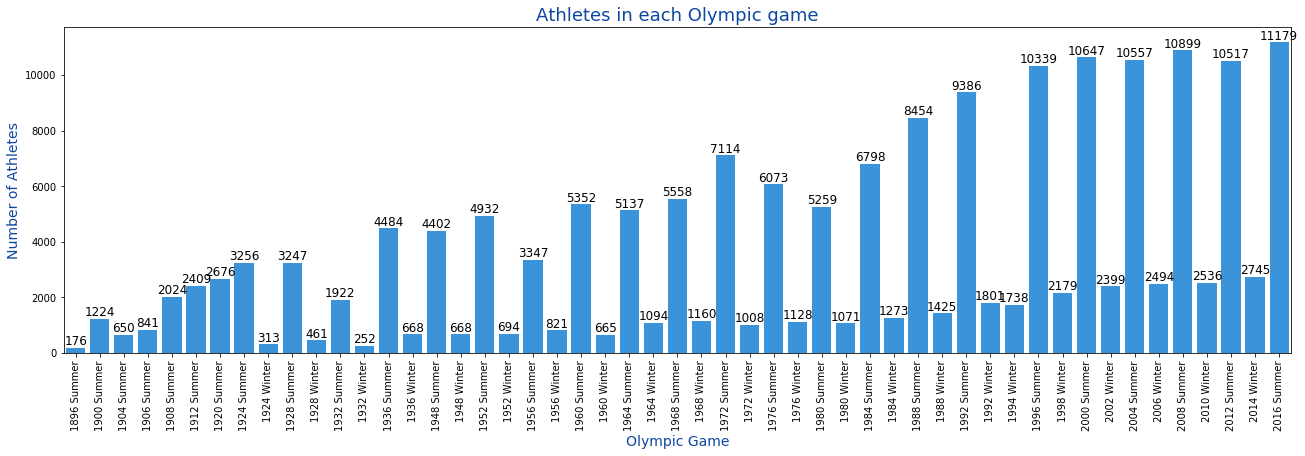

In [10]:
games_athletes = athlete.pivot_table(athlete, index=['Games'], aggfunc=lambda x: len(x.unique())).reset_index()[['Games','ID']]
fig, ax = plt.subplots(figsize=(22,6))
a = sns.barplot(x='Games', y='ID', data=games_athletes, ax=ax, color="#2196F3")
a.set_xticklabels(labels=games_athletes['Games'],rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax.set_xlabel('Olympic Game', size=14, color="#0D47A1")
ax.set_ylabel('Number of Athletes', size=14, color="#0D47A1")
ax.set_title('Athletes in each Olympic game', size=18, color="#0D47A1")

plt.show()


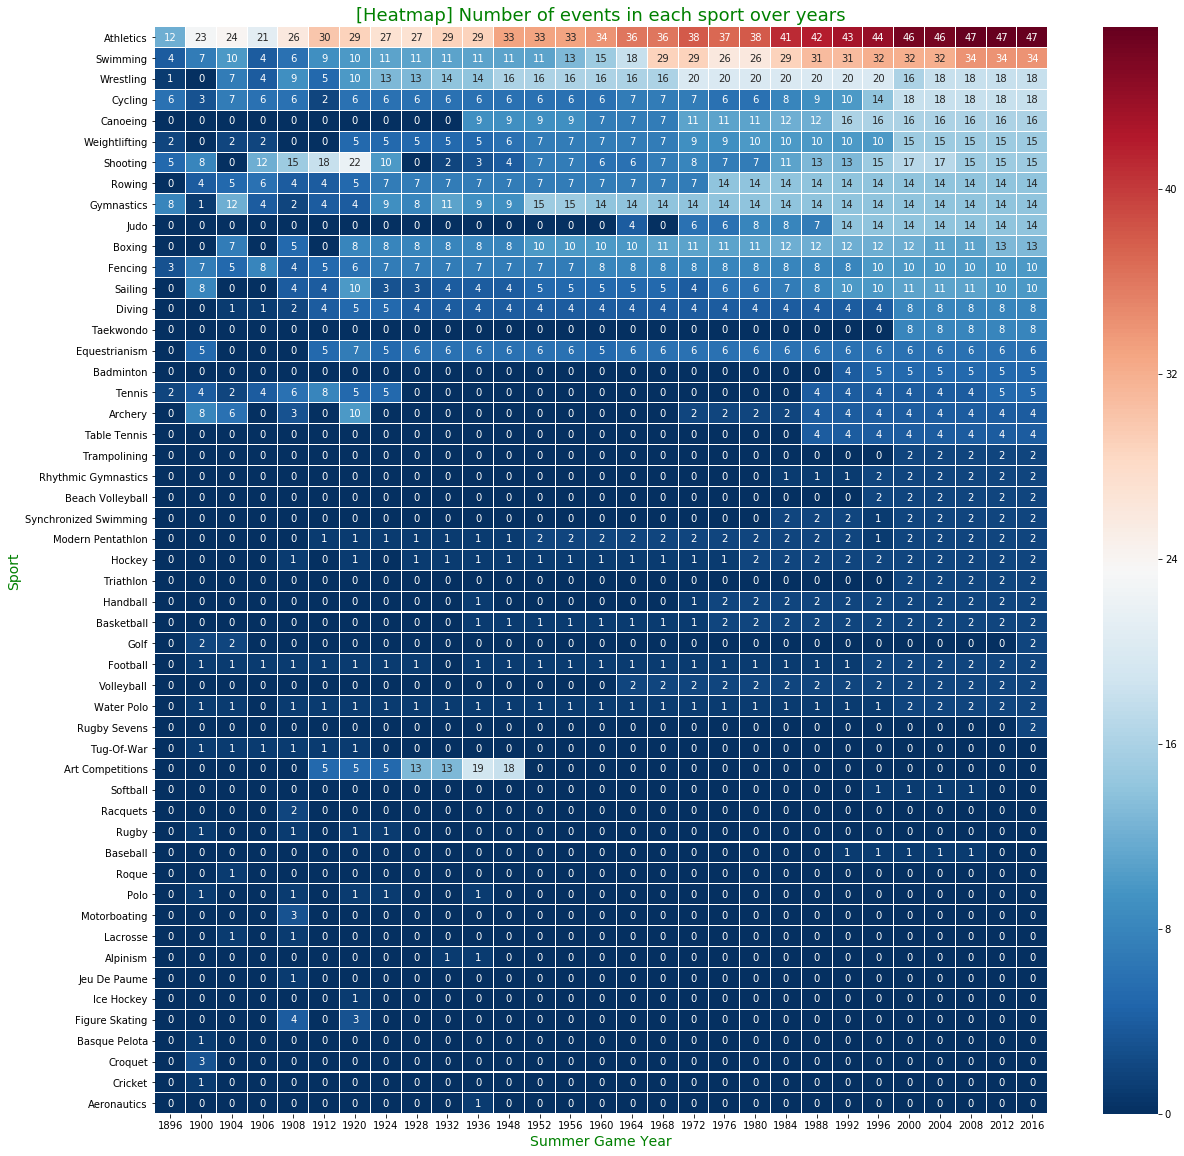

In [13]:
sport_year = athlete[athlete['Season']=='Summer'].pivot_table(athlete, index=['Year','Sport'], aggfunc=lambda x: len(x.unique())).reset_index()[['Year','Sport','Event']]
sport_year = sport_year.pivot("Sport", "Year", "Event")
sport_year.fillna(0,inplace=True)
sport_year = sport_year.reindex(sport_year.sort_values(by=2016, ascending=False).index)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(sport_year, annot=True, linewidths=0.05, ax=ax, cmap="RdBu_r")
ax.set_xlabel('Summer Game Year', size=14, color="green")
ax.set_ylabel('Sport', size=14, color="green")
ax.set_title('[Heatmap] Number of events in each sport over years', size=18, color="green")
plt.show()

# Body types of athletes
 

* first lets look at age
 

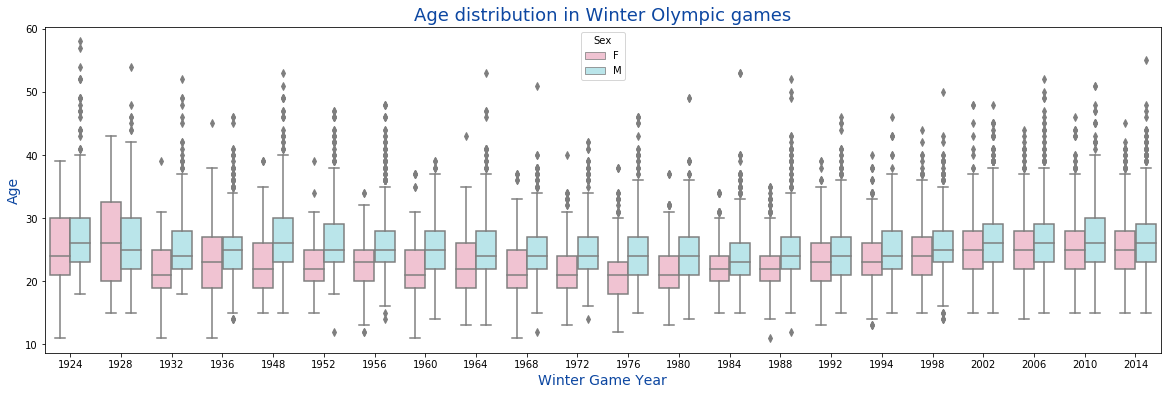

In [15]:
fig, ax = plt.subplots(figsize=(20,6))
a = sns.boxplot(x="Year", y="Age", hue="Sex", palette={"M": "#B2EBF2", "F":"#F8BBD0"}, data=athlete[athlete['Season']=='Winter'], ax=ax)
        
ax.set_xlabel('Winter Game Year', size=14, color="#0D47A1")
ax.set_ylabel('Age', size=14, color="#0D47A1")
ax.set_title('Age distribution in Winter Olympic games', size=18, color="#0D47A1")
plt.show()

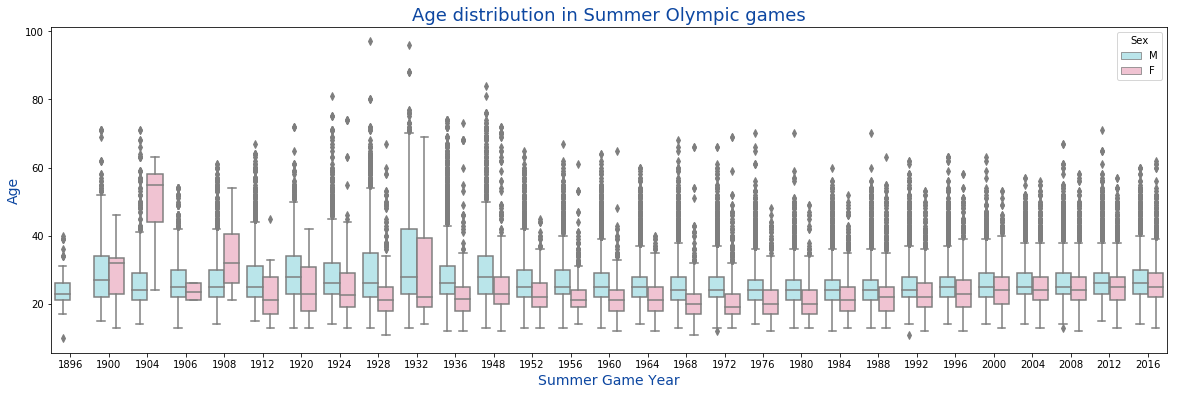

In [16]:
fig, ax = plt.subplots(figsize=(20,6))
a = sns.boxplot(x="Year", y="Age", hue="Sex", palette={"M": "#B2EBF2", "F":"#F8BBD0"}, data=athlete[athlete['Season']=='Summer'], ax=ax)
        
ax.set_xlabel('Summer Game Year', size=14, color="#0D47A1")
ax.set_ylabel('Age', size=14, color="#0D47A1")
ax.set_title('Age distribution in Summer Olympic games', size=18, color="#0D47A1")
plt.show()

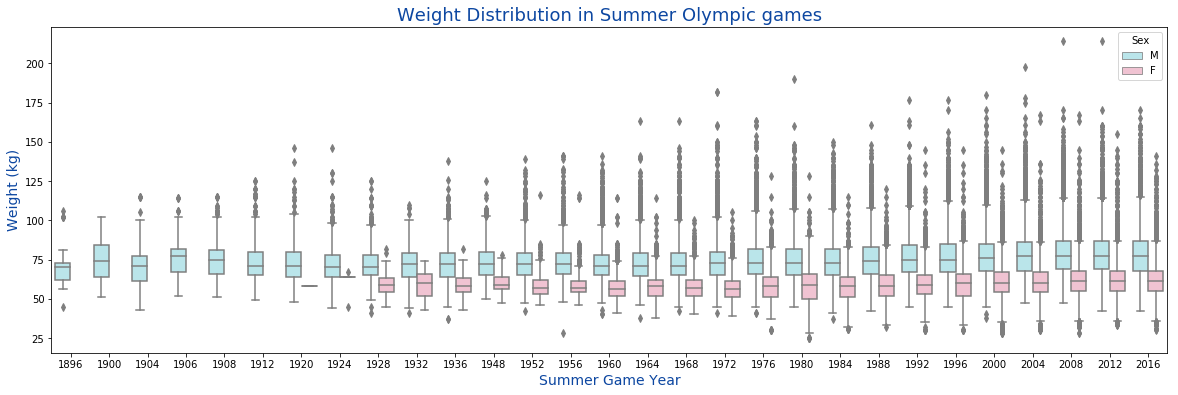

In [20]:
fig, ax = plt.subplots(figsize=(20,6))
a = sns.boxplot(x="Year", y="Weight", hue="Sex", palette={"M": "#B2EBF2", "F":"#F8BBD0"}, data=athlete[athlete['Season']=='Summer'], ax=ax)
        
ax.set_xlabel('Summer Game Year', size=14, color="#0D47A1")
ax.set_ylabel('Weight (kg)', size=14, color="#0D47A1")
ax.set_title('Weight Distribution in Summer Olympic games', size=18, color="#0D47A1")
plt.show()


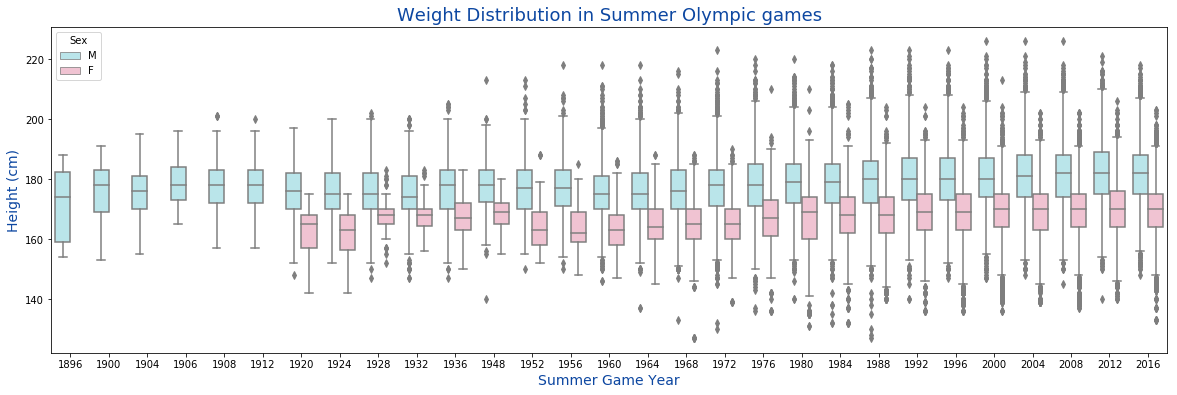

In [21]:
fig, ax = plt.subplots(figsize=(20,6))
a = sns.boxplot(x="Year", y="Height", hue="Sex", palette={"M": "#B2EBF2", "F":"#F8BBD0"}, data=athlete[athlete['Season']=='Summer'], ax=ax)
        
ax.set_xlabel('Summer Game Year', size=14, color="#0D47A1")
ax.set_ylabel('Height (cm)', size=14, color="#0D47A1")
ax.set_title('Weight Distribution in Summer Olympic games', size=18, color="#0D47A1")
plt.show()

* Initial conclusions : 

We find that the weight and heights have been pretty consistent, but we see many more outliers. at the top end of the weight, and the bottom end of the height in recent years. 

Lets see what they are, and if you could be used to cluster them according to the different sports. 
